In [1]:
# 1 classfication
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# load dataset
iris = load_iris()
X,y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# create and train model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# make predictions and evaluate
predictions = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

Accuracy: 1.00


In [3]:
# 2 Regression
# predicting continuous values

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, predictions):.2f}")

MSE: 2900.19


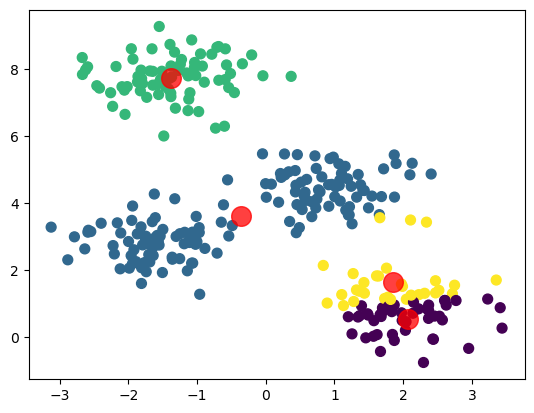

In [7]:
# 3. Clustering
# Grouping similar data points

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# crt synthetic data 
X,_=make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-mean clustering
kmeans =KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# visualize clusters
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='red', s=200, alpha=0.75)
plt.show()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_19040\1715188736.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


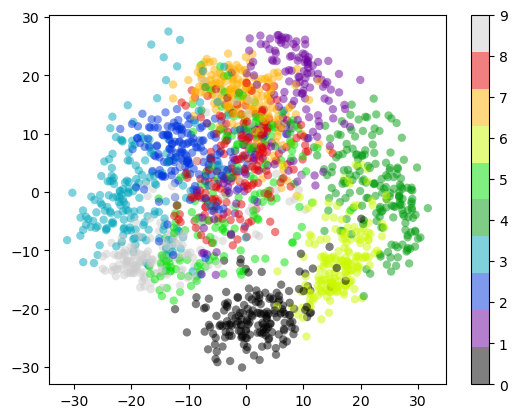

In [17]:
# 4 Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X = digits.data

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Visualize reduced data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

In [19]:
# 5 Model Selection
## Evaluation and comparing models

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Cross-validation
scores = cross_val_score(RandomForestClassifier(), iris.data, iris.target, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.2f}")

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean accuracy: 0.96


In [21]:
# 6 Preporcessing 
# Preparing data for modeling

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40],
    'income': [50000, 60000, 70000, 80000],
    'gender': ['M', 'F', 'F', 'M']
})

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'income']),
        ('cat', OneHotEncoder(), ['gender'])
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(data)
print(X_processed.toarray())

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [23]:
# 7. Feature Extraction
# Converting raw data into features
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Create TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


In [25]:
# 8 Ensemble MEthods 
# combining multiple models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Create ensemble of classifiers
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

# Evaluate each classifier
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.0
RandomForestClassifier 0.0
SVC 0.0
VotingClassifier 0.0


In [27]:
# 9 Neural NEtworks (Basic)
# Simple MLP implementation
from sklearn.neural_network import MLPClassifier

# Create and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate
print(f"Accuracy: {mlp.score(X_test, y_test):.2f}")

Accuracy: 0.00


C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
# 10 model persistence 
# saving and loading models 
from sklearn.externals import joblib

# Save model
joblib.dump(knn, 'knn_model.pkl')

# Load model
loaded_model = joblib.load('knn_model.pkl')
print(loaded_model.predict(X_test[:1]))

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\externals\__init__.py)

In [33]:
from sklearn.utils import _joblib

# Save model
_joblib.dump(knn, 'knn_model.pkl')

# Load model
loaded_model = _joblib.load('knn_model.pkl')
print(loaded_model.predict(X_test[:1]))

ValueError: X has 10 features, but KNeighborsClassifier is expecting 4 features as input.

In [35]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.
